In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

sys.path.append(LIBRARY_DIR)

In [3]:
import os

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(LIBRARY_DIR, 'site', '2017', '12', '10', 'images', image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

In [4]:
from itertools import product

import numpy as np

from neupy.algorithms.competitive.neighbours import find_neighbours_on_rect_grid
from examples.competitive.utils import plot_2d_grid

red, blue, black, gray = ('#E24A33', '#348ABD', '#000000', '#AAAAAA')

In [5]:
import math
from neupy import algorithms

def plot_grid(current_grid, data=None, color=blue):
    plot_2d_grid(
        np.transpose(current_grid.reshape((9, 9, 2)), (2, 0, 1)),
        color=color)

    plt.scatter(*current_grid.T, color=color, s=50, zorder=100)
    
    if data is not None:
        plt.scatter(*data.T, color=black, s=100)

        plt.xlim(-9, 17)
        plt.ylim(-9, 17)

    plt.xticks([])
    plt.yticks([])
    
def make_grid():
    return np.array(list(product(range(9), range(9))))

def make_sofm(step=0.4, radius=2, std=1):
    current_grid = make_grid()
    return algorithms.SOFM(
        n_inputs=2,
        step=step,
        features_grid=(9, 9),
        learning_radius=radius,
        std=std,
        weight=current_grid.T)

In [6]:
def sofm_diagrams_two_rotating_dots(step=0.4, radius=2, std=1, rotation_angle=360, color=blue, show_dots=False):
    data = np.array([[15, 4, -7, 4], [4, 15, 4, -7]]).T
    data = data[[0, 2], :]
    sofm = make_sofm(step, radius, std)
    
    iterations = 360 // rotation_angle

    for i in range(iterations):
        phi = math.radians(rotation_angle)
        rotation = np.array([
            [math.cos(phi), -math.sin(phi)],
            [math.sin(phi), math.cos(phi)],
        ])
        data = (data - 4).dot(rotation) + 4
        sofm.train(data, epochs=1)
        
        if show_dots:
            plt.scatter(*data.T, color=gray, s=100)

    plot_grid(
        current_grid=sofm.weight.T,
        data=data if show_dots else None,
        color=color)

def sofm_diagrams_four_fixed_dots(step=0.4, radius=2, std=1, color=blue, show_dots=False):
    data = np.array([[15, 4, -7, 4], [4, 15, 4, -7]]).T

    sofm = make_sofm(step, radius, std)
    sofm.train(data, epochs=1)

    plot_grid(
        current_grid=sofm.weight.T,
        data=data if show_dots else None,
        color=color)

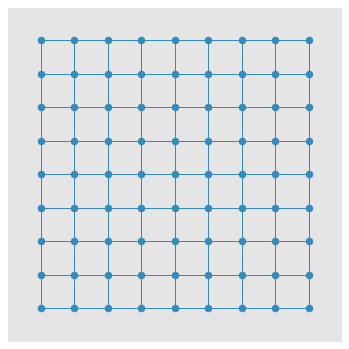

In [7]:
plt.figure(figsize=(6, 6))
plot_grid(current_grid=make_grid(), color=blue)
saveas('sofm-grid')

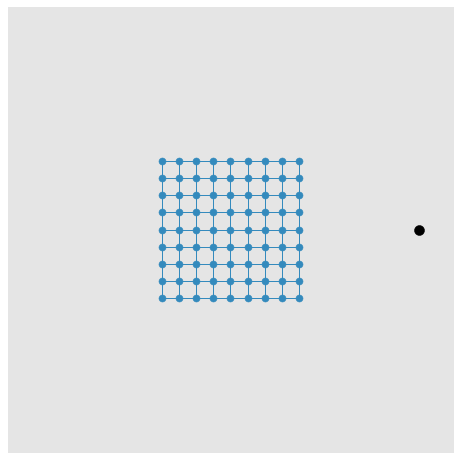

In [8]:
plt.figure(figsize=(8, 8))
data = np.array([[15], [4]]).T

sofm = make_sofm(step=0.25, radius=2, std=1)

plot_grid(current_grid=sofm.weight.T, color=blue, data=data)
saveas('sofm-before-update-with-one-data-point')

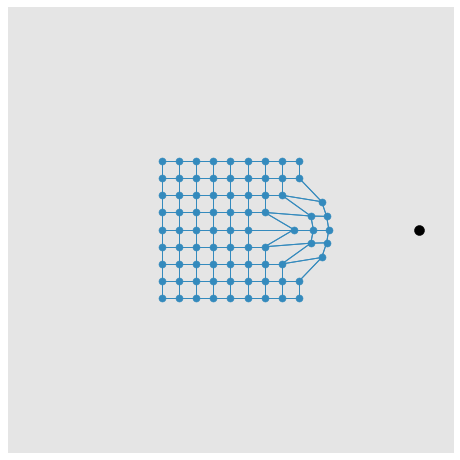

In [9]:
plt.figure(figsize=(8, 8))
data = np.array([[15], [4]]).T

sofm = make_sofm(step=0.25, radius=2, std=1)
sofm.train(data, epochs=1)

plot_grid(current_grid=sofm.weight.T, color=blue, data=data)
saveas('sofm-update-with-one-data-point')

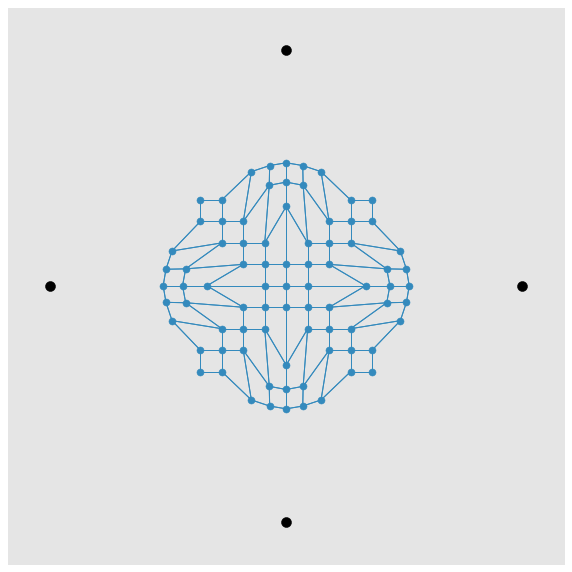

In [10]:
plt.figure(figsize=(10, 10))
sofm_diagrams_four_fixed_dots(
    # The larger the value the closer points will be
    # pulled to the black dots
    step=0.25,

    # The bigger the radius the more dots will
    # be pulled closer to the black dots
    radius=2,

    # The larger the value the "force" will be applied to
    # the neighbour during the pulling
    std=1,

    # Show black dots that we use for SOFM training on the plot
    show_dots=True,
)
saveas('sofm-4-dots-update')

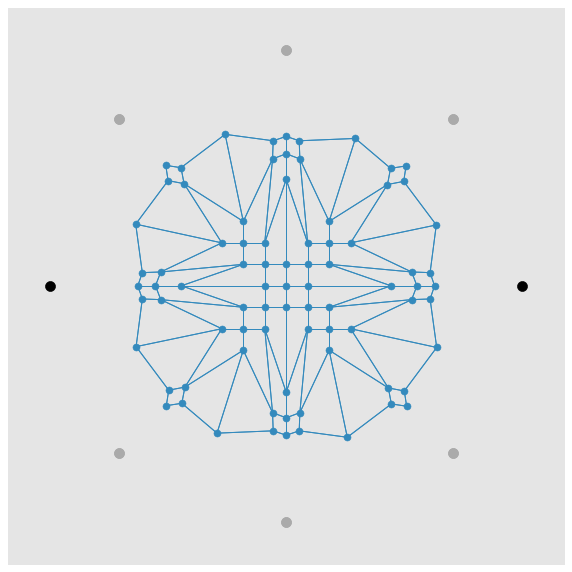

In [11]:
plt.figure(figsize=(10, 10))
sofm_diagrams_two_rotating_dots(
    step=0.25,
    radius=2,
    std=1,
    show_dots=True,
    # There are two dots that we use as training sample for sofms
    # Rotation angle defines by how much we will rotate data points
    # before training another epoch
    rotation_angle=45,
)
saveas('sofm-update-and-rotate')

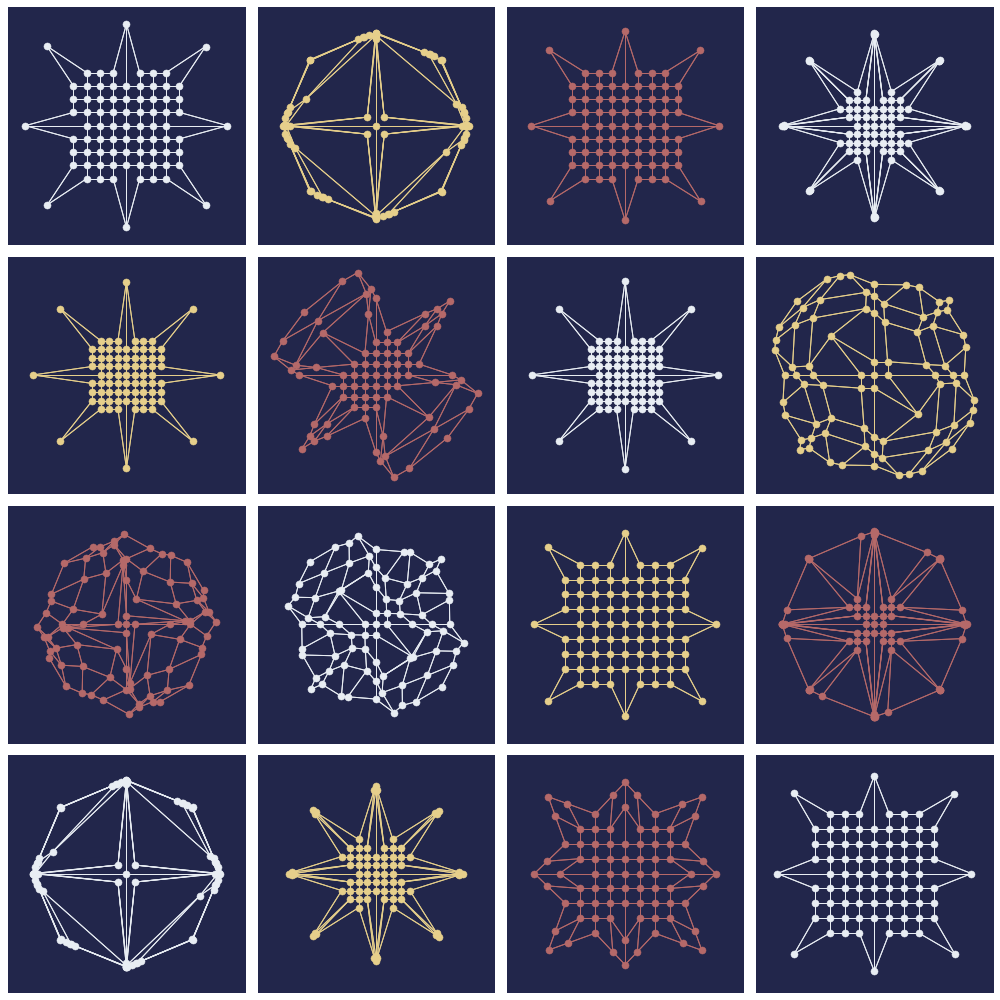

In [12]:
fig = plt.figure(figsize=(14, 14))

np.random.seed(33)
use_dark_background = True

if use_dark_background:
    bgcolor = '#22264b'
    colors = ['#b56969', '#e8edf3', '#e6cf8b']
    
else:
    bgcolor = '#e8edf3'
    colors = ['#b56969', '#22264b', '#e6cf8b']

for index in range(1, 17):
    plt.subplot(4, 4, index)
    plt.gca().patch.set_facecolor(bgcolor)
    
    step = np.random.uniform(0.1, 1)
    radius = np.random.randint(0, 4)
    std = np.random.uniform(0.1, 2)
    color = colors[index % 3]
    
    sofm_diagrams_two_rotating_dots(step, radius, std, rotation_angle=45, color=color, show_dots=False)
    
    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    dist = min(4 - xmin, 4 - ymin, xmax - 4, ymax - 4)

    plt.xlim(4 - dist, 4 + dist)
    plt.ylim(4 - dist, 4 + dist)
    
plt.tight_layout()
saveas('sofm-16-generated-patterns')

In [13]:
def plot_pattern(step, radius, std, color):
    fig = plt.figure(figsize=(7, 7))
    plt.gca().patch.set_facecolor(bgcolor)

    sofm_diagrams_two_rotating_dots(step, radius, std, rotation_angle=45, color=color, show_dots=False)

    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    dist = min(4 - xmin, 4 - ymin, xmax - 4, ymax - 4)

    plt.xlim(4 - dist, 4 + dist)
    plt.ylim(4 - dist, 4 + dist)

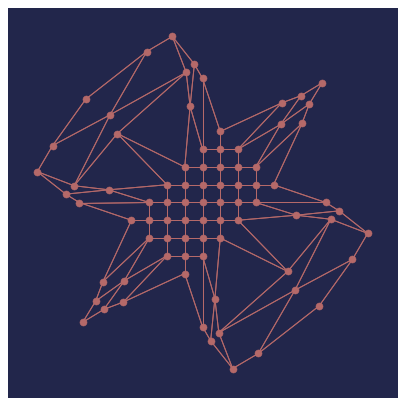

In [14]:
plot_pattern(step=0.5, radius=2, std=0.4, color=colors[0])
saveas('sofm-bird-pattern')

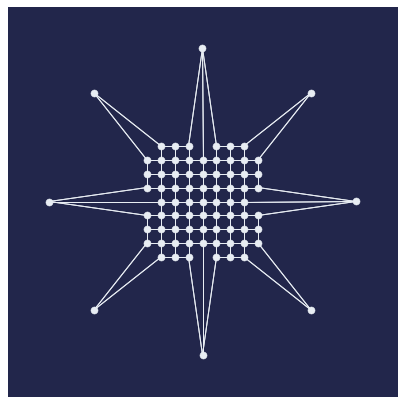

In [15]:
plot_pattern(step=1, radius=0, std=0.4, color=colors[1])
saveas('sofm-star-pattern')

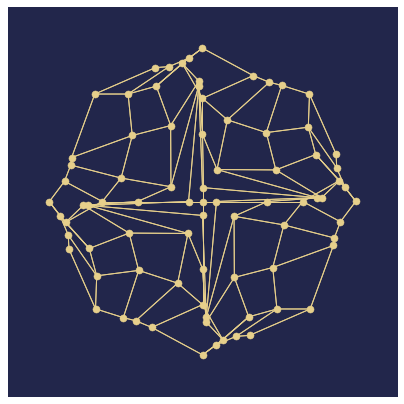

In [16]:
plot_pattern(step=1, radius=3, std=0.4, color=colors[2])
saveas('sofm-blob-pattern')